In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Дана неотрицательная функция 𝑝(𝑥), непрерывная на отрезке [𝑎, 𝑏] и принимающая
нулевое значение вне этого отрезка.

Дана ещё одна неотрицательная функция 𝑞(𝑦), непрерывная на отрезке [𝑐, 𝑑] и
принимающая нулевое значение вне этого отрезка.

Мы полагаем далее, что X – непрерывная случайная величина с плотностью
вероятности 𝑃 ∙ 𝑝(𝑥). Аналогично, Y – непрерывная случайная величина с плотностью вероятности 𝑄 ∙ 𝑞(𝑦).

Требуется с помощью численного метода интегрирования высокого порядка вычислить с шагом по аргументу h=0,01: 


 - Постоянные множители P и Q, при которых $\int\limits_1^3 P p(x)dx$ и 
 $\int\limits_0^1 Q q(y)dy$
 - Множество элементарных исходов случайной величины Z = X + Y
 - Плотность вероятности суммы случайных величин Z = X + Y 
 - Полную вероятность для случайной величины Z:      $\int\limits_{z_{max}}^{z_{min}} f(z)dz$, сравнив в конце результат с единицей.
 - Вывести графики плотностей вероятности для величин X, Y, Z.

#### Вычислим постоянные множители P и Q

По условию задано:
 - $p(x) = x$, на участке [1, 3]
 - $q(x) = x^2$, на участке [0, 1]

In [3]:
def p(x):
    if x >= 1 and x <= 3:
        return x
    return 0

def q(x):
    if x >= 0 and x <= 1:
        return x**2
    return 0

In [4]:
def seek_constant(low, high, function, h):
    sum_p = 0
    while low <= high:
        sum_p += function((low + (low + h)) / 2)
        low += h
    const = 1 / (h * sum_p)
    return const

In [5]:
a, b = 1, 3
c, d = 0, 1

P = seek_constant(a, b, p, 0.01)
Q = seek_constant(c, d, q, 0.01)

print('Постоянные множители:')
print('P = %.4f' % P)
print('Q = %.4f' % Q)

Постоянные множители:
P = 0.2500
Q = 3.0001


In [6]:
print('Множество элементарных исходов случайной величины Z = X + Y: %.4f' % (P * Q))

Множество элементарных исходов случайной величины Z = X + Y: 0.7500


Метод средних прямоугольников:

In [7]:
def average_rectangle(low, high, function, h, z = None):
    integral = 0
    while low <= high:
        if z or z == 0.:
            if z < 1 or z > 4:
                return 0
            else:
                integral += function( (low + (low + h)) / 2, z)
        else:
            integral += function( (low + (low + h)) / 2)
        low += h
    return integral * h

Проверим значения интегралов:

In [8]:
func_p = lambda x: P * p(x)
func_q = lambda x: Q * q(x)
print('first integral = %.4f ' % average_rectangle(a, b, func_p, 0.01))
print('second integral = %.4f ' % average_rectangle(c, d, func_q, 0.01))

first integral = 1.0000 
second integral = 1.0000 


#### Плотность вероятности суммы случайных величин Z = X + Y:

In [9]:
func_z = lambda x, z: P * p(x) * Q * q(z - x)

Посмотрим на значения в некоторых точках:

In [10]:
print('При z = 0.5:  %.4f ' % average_rectangle(a, b, func_z, 0.01, z = 0.5))
print('При z = 3:  %.4f ' % average_rectangle(a, b, func_z, 0.01, z = 3))

При z = 0.5:  0.0000 
При z = 3:  0.5625 


#### Посчитаем полную вероятность для величины Z:

In [11]:
n1 = (b - a) / 0.01
n2 = (d - c) / 0.01
Z = np.linspace(a + c, b + d, int(n1 + n2 + 1))
F = np.zeros(int(n1 + n2 + 1))
for i in range(F.shape[0]):
    F[i] = average_rectangle(a, b, func_z, 0.01, Z[i])

In [13]:
def average_rectangle_for_z(X, h):
    integral = 0
    for i in range(X.shape[0] - 1):
        integral += (X[i] + X[i + 1]) / 2
    return integral * h

In [14]:
print('Полная вероятность Z = %.4f' % average_rectangle_for_z(F, 0.01))

Полная вероятность Z = 1.0000


In [15]:
average_rectangle_for_z(F, 0.01)

1.000000000000018

#### Графики плотностей вероятности для X, Y, Z

In [16]:
def plotting(X, func, label):
    plt.plot(X, [func(i) for i in X],
         label = label)
    plt.legend()

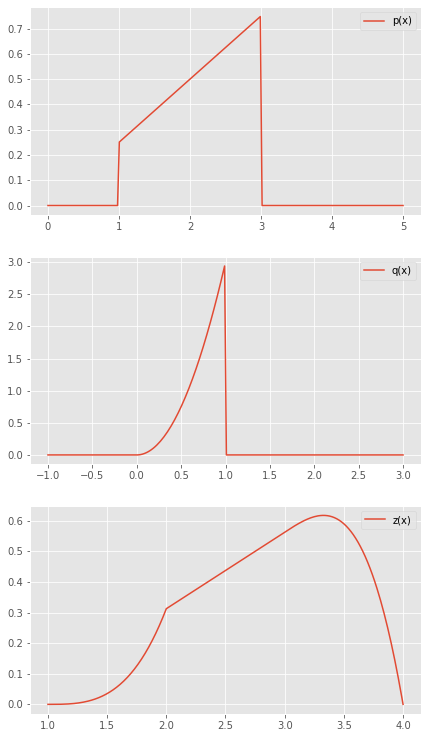

In [17]:
plt.figure(figsize(7, 13))
plt.subplot(3, 1, 1)
plotting(np.linspace(0, 5, 200), func_p, 'p(x)')

plt.subplot(3, 1, 2)
plotting(np.linspace(-1, 3, 200), func_q, 'q(x)')

plt.subplot(3, 1, 3)
plt.plot(Z, F, label = 'z(x)')
plt.legend()

plt.show()

In [54]:
def average_rectangle(low, high, function, h, z = None):
    integral = 0
    while low <= high:
        if z or z == 0.:
            integral += function( (low + (low + h)) / 2, z)
        else:
            integral += function( (low + (low + h)) / 2)
        low += h
    return integral * h

In [39]:
def I(x):
    return 14*np.sin(100*3.14*(x + 2)) - 2*np.sin(200*3.14*(x - 1)) + 0.5*np.sin(600*3.14*(x - 0.3)) - 0.04*np.sin(1100*3.14*(x - 0.7))

def I_square(x):
    return I(x)**2

#### I

In [38]:
average_rectangle(0, 1, I, 0.01)

0.41146542371209804

#### $I^2$

In [44]:
np.sqrt(average_rectangle(0, 1, I_square, 0.01))

12.93395936999753

#### Ampl

In [43]:
vi = [i for i in range(50, 2050, 50)]

In [65]:
func_ci = lambda x, v: I(x) * np.cos(2*3.14*v*x)
func_si = lambda x, v: I(x) * np.sin(2*3.14*v*x)

In [50]:
func_ci(0, 1)

-4.907011329962306

In [61]:
ci = []
for i in vi:
    ci.append(average_rectangle(0, 1, func_ci, 0.01, i) / i)

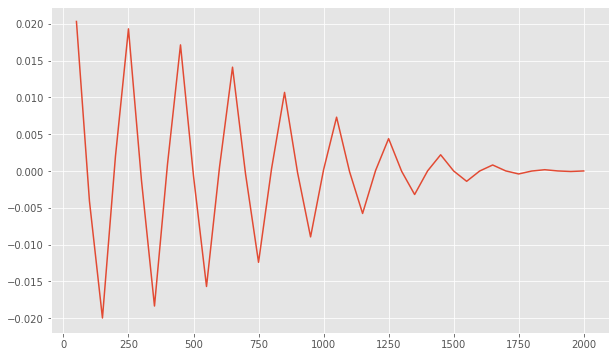

In [63]:
plt.figure(figsize(10, 6))
plt.plot(vi, ci);

In [69]:
si = []
for i in vi:
    si.append(average_rectangle(0, 1, func_si, 0.01, i) / i)

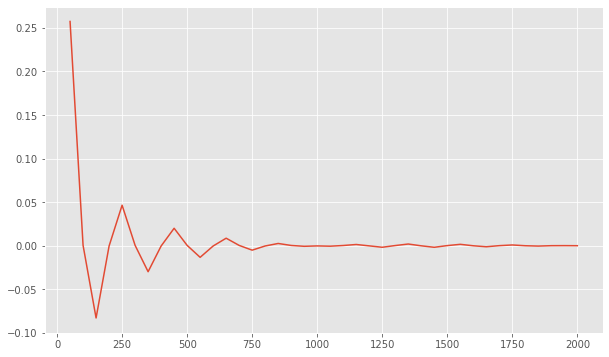

In [70]:
plt.figure(figsize(10, 6))
plt.plot(vi, si);